# Python and R

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.1.4      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [6]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
3660,2512,3105,7401,2008,2008_Pres-R_WI,WI,Pres-P,Pres-R,Research 2000,281,Live Phone,NaN,2/14/08,400.0,John McCain,44,REP,48.0,Mike Huckabee,47,REP,32.0,7.0,16.0,2/19/08,54.74,36.95,17.79,NaN,1.0,NaN
3912,63834,117537,4262,2008,2008_House-G_NE-2,NE-2,House-G,House-G,ALG Research,14,Live Phone,D,10/14/08,400.0,Jim Esch,13808,DEM,46.0,Lee Terry,13809,REP,47.0,NaN,-1.0,11/4/08,48.07,51.93,-3.85,2.85,1.0,for Jim Esch
6962,33824,137740,19,2014,2014_Sen-G_TX,TX,Sen-G,Sen-G,YouGov,391,Online,NaN,10/15/14,866.0,David M. Alameel,6197,DEM,31.0,John Cornyn,6201,REP,57.0,7.0,-26.0,11/4/14,34.36,61.56,-27.20,1.20,1.0,for Texas Tribune
579,63609,117073,816,2000,2000_Pres-G_GA,GA,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/22/00,1029.0,Al Gore,222,DEM,40.0,George W. Bush,241,REP,50.0,NaN,-10.0,11/7/00,42.98,54.67,-11.69,1.69,1.0,NaN
2147,4550,30546,1636,2004,2004_Sen-G_NC,NC,Sen-G,Sen-G,SurveyUSA,325,IVR,NaN,10/23/04,686.0,Erskine Bowles,3268,DEM,44.0,Richard Burr,3267,REP,50.0,NaN,-6.0,11/2/04,47.02,51.60,-4.58,-1.42,1.0,NaN


The cell below loads the same data in R:

In [7]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [11]:
df.query('pollster=="Siena College/The New York Times Upshot"').head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
8112,47325,74070,52,2016,2016_Gov-G_NC,NC,Gov-G,Gov-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Roy A. Cooper,8967,DEM,51.0,Pat McCrory,8959,REP,45.0,NaN,6.0,11/8/16,49.02,48.80,0.22,5.78,1.0,for New York Times | New York Times Upshot
8116,47325,74050,62,2016,2016_Sen-G_NC,NC,Sen-G,Sen-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Deborah K. Ross,10153,DEM,47.0,Richard Burr,8963,REP,46.0,NaN,1.0,11/8/16,45.37,51.06,-5.70,6.70,0.0,for New York Times | New York Times Upshot


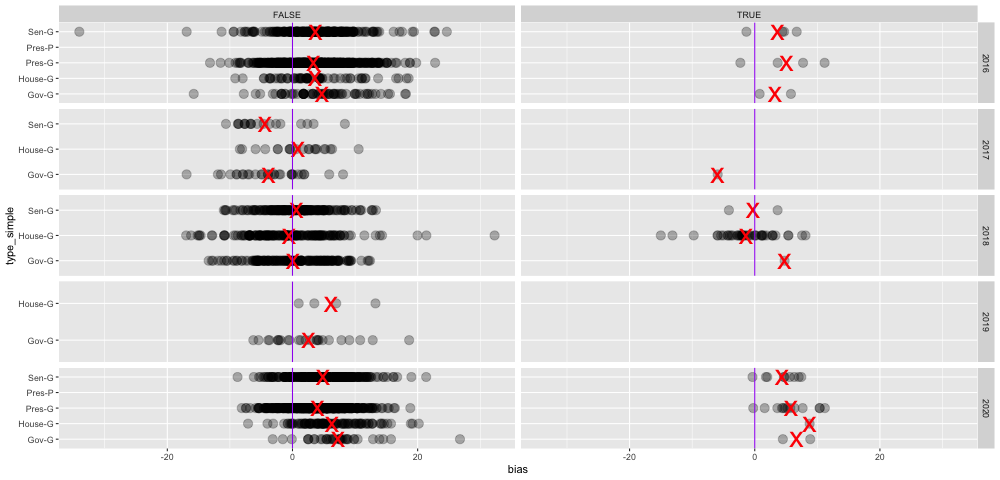

In [45]:
%%R -w 1000


plot_type_1 <- function(pollster_to_plot) {

    pollster_df <- df %>% filter(pollster==pollster_to_plot)
    ggplot(df %>% filter(year>=2016)) +
        aes(x=bias, y=type_simple) +
        geom_point(size=4, alpha=.3) +
        stat_summary(fun.y=mean, geom="point", shape='x',
                     size=10, color="red", alpha=1) +
        geom_vline(aes(xintercept=0), color="purple") +
        facet_grid(year~pollster==pollster_to_plot, scales='free_y')
}


plot_type_1('Siena College/The New York Times Upshot')



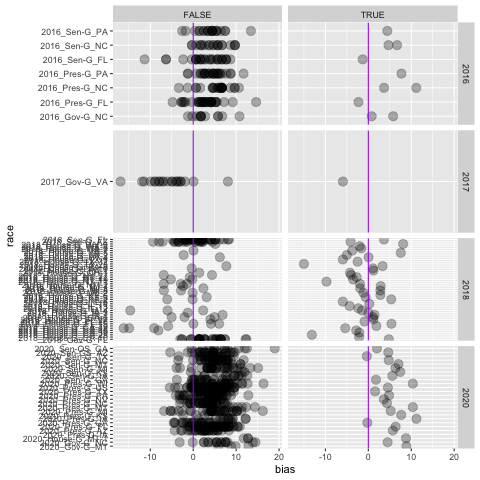

In [63]:
%%R


base_plot <- function(pollster_to_plot) {
    # code inside the function     
    
    pollster_df <- df %>% filter(pollster==pollster_to_plot)

    only_races_this_pollster_has_polled <- pollster_df$race %>% unique()

    polls_from_races_this_pollster_has_polled <- df %>% filter(race %in% only_races_this_pollster_has_polled)


    ggplot(polls_from_races_this_pollster_has_polled) +
        aes(x=bias, y=race) +
        geom_point(size=4, alpha=.3) +
        geom_vline(aes(xintercept=0), color="purple")

}



base_plot('Siena College/The New York Times Upshot')  +
        facet_grid(year~pollster==pollster_to_plot, scales='free_y')


- not very far off, when they're off they're about as off as the average of all the other polls
- 2016 polls onwards only
- lots of polls for 2018 H
- 

👉 **Jayhawk Consulting**

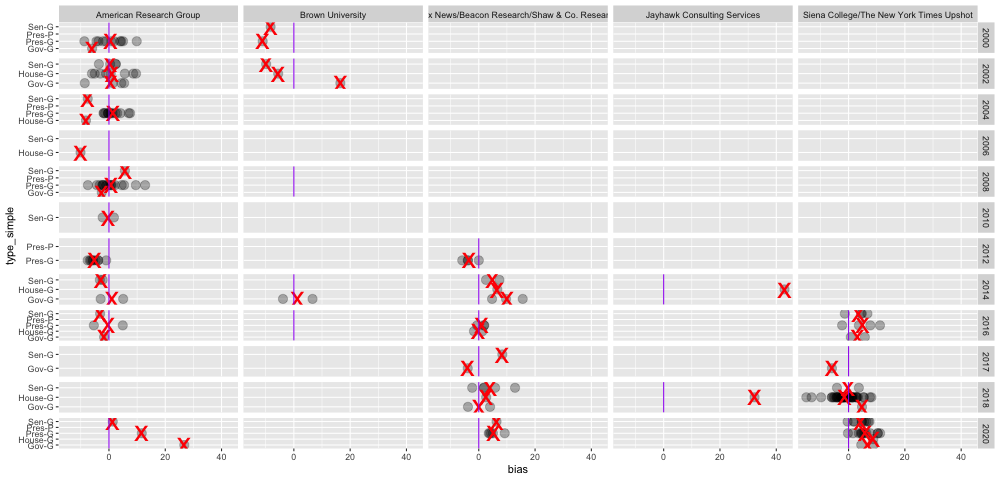

In [112]:
%%R -w 1000

pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services','Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 'American Research Group')

pollster_df <- df %>% filter(pollster %in% pollsters_i_want)

ggplot(pollster_df) +
    aes(x=bias, y=type_simple) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_grid(year~pollster, scales='free_y') 

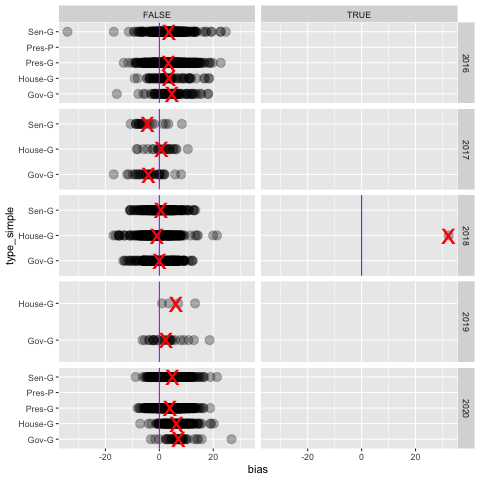

In [42]:
%%R

plot_type_1('Jayhawk Consulting Services')


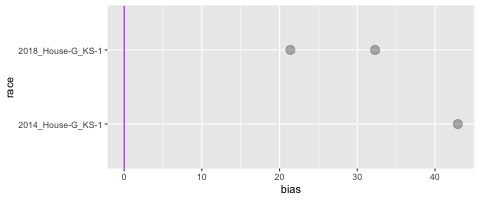

In [67]:
%%R -h 200

base_plot('Jayhawk Consulting Services')  


- seems to overestimate democrats, BUT there are only three polls, one from 2014 one from 2018 AND they only poll KS-1

👉 **Fox News/Beacon Research/Shaw & Co. Research**

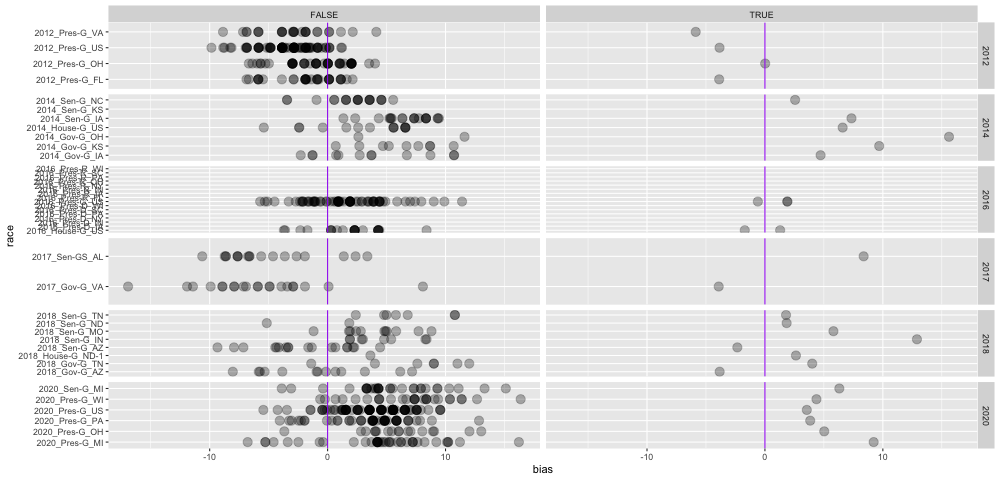

In [73]:
%%R -w 1000

base_plot('Fox News/Beacon Research/Shaw & Co. Research')   +
    facet_grid(year~pollster=='Fox News/Beacon Research/Shaw & Co. Research', scales='free_y') 


👉 **Brown University**

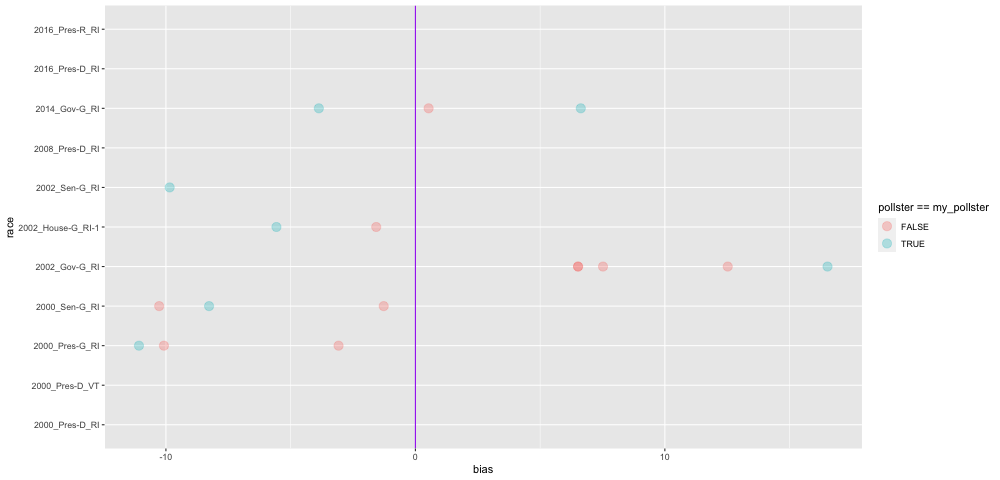

In [77]:
%%R -w 1000

my_pollster <- 'Brown University'

base_plot(my_pollster)  + aes(color=pollster==my_pollster)


👉 **American Research Group**

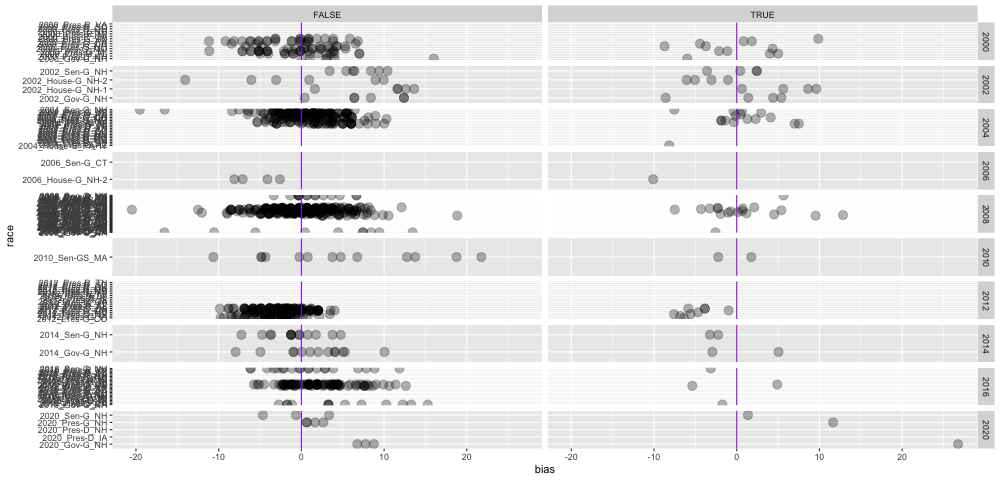

In [80]:
%%R -w 1000

base_plot('American Research Group')   +
    facet_grid(year~pollster=='American Research Group', scales='free_y') 


In [171]:
my_pollster = 'Siena College/The New York Times Upshot'
races_arg_polled = df.query('pollster==@my_pollster').race.unique()

polls_from_relevant_races = df[df['race'].isin(races_arg_polled)]

non_arg = polls_from_relevant_races.query("pollster!=@my_pollster").pivot_table(index='race', values='error', aggfunc='mean')
arg = polls_from_relevant_races.query("pollster==@my_pollster").pivot_table(index='race', values='error', aggfunc='mean')

errors = non_arg.reset_index().merge(arg.reset_index(), on='race', suffixes=('_non_arg', '_arg')).round(1)
errors['diff'] = errors['error_arg'] - errors['error_non_arg']
errors.sort_values(by='diff')
errors.mean()

error_non_arg    4.882258
error_arg        4.219355
diff            -0.662903
dtype: float64

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

In [109]:
import numpy as np

my_pollsters=["American Research Group", "Brown University", "Fox News/Beacon Research/Shaw & Co. Research", 
           'Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services']


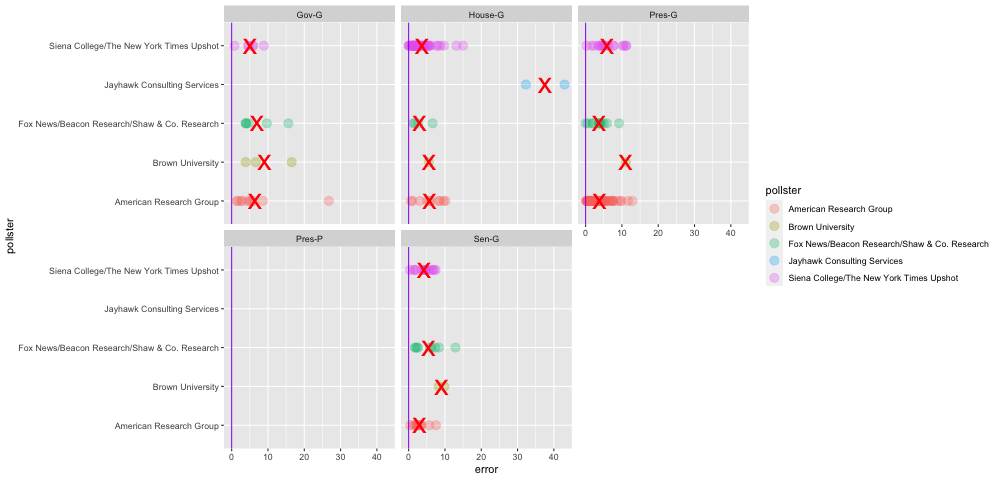

In [129]:
%%R -w 1000 

pollsters_i_want <- c('Siena College/The New York Times Upshot', 
                      'Jayhawk Consulting Services','Brown University', 
                      'Fox News/Beacon Research/Shaw & Co. Research', 'American Research Group')

pollster_df <- df %>% filter(pollster %in% pollsters_i_want) %>%
    mutate(error = abs(bias))

ggplot(pollster_df) +
    aes(x=error, y=pollster, color=pollster) +
    geom_point(size=4, alpha=.3) +
    stat_summary(fun.y=mean, geom="point", shape='x',
                 size=10, color="red", alpha=1) +
    geom_vline(aes(xintercept=0), color="purple") +
    facet_wrap(~type_simple)

In [144]:
piv = df \
    .pivot_table(index='pollster', values='error', aggfunc=['mean', 'median', 'std', 'count']) \
    .sort_values(by=('mean', 'error'))\

piv[piv[('count','error')] > 10].tail(25)

,mean,median,std,count
,error,error,error,error
pollster,,,,
ALG Research,6.311000,5.365,4.365771,20
Global Strategy Group,6.418800,4.390,5.687040,25
SurveyMonkey,6.432745,5.430,4.502547,255
Moore Information,6.463333,6.850,3.146872,12
St. Cloud State University,6.490000,5.400,3.348322,15
Targoz Market Research,6.582667,4.090,5.596986,15
Benenson Strategy Group,6.615455,6.980,3.966175,11
Montana State University Billings,6.639091,6.260,4.187392,11


In [101]:
df.pivot_table(index='pollster', values='bias', aggfunc=['mean', 'median', 'std', 'count']) \
    .sort_values(by=('mean', 'bias'), ascending=False)\
    .head(25)

,mean,median,std,count
,bias,bias,bias,bias
pollster,,,,
Jayhawk Consulting Services,37.615000,37.615,7.530687,2
Riggs Research Services,33.650000,33.650,NaN,1
Bainbridge Media Group,21.180000,21.180,NaN,1
Craciun Research Group,18.730000,18.730,NaN,1
Triton Polling & Research,17.285000,17.285,2.184960,2
Brigham Young University,16.440000,17.195,5.596600,4
University of Wyoming,15.153333,15.380,1.068192,3
DeSales University,14.270000,14.270,NaN,1


👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
